In [126]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X, y

(array([[0.61354406],
        [1.12927665],
        [0.33699289],
        [0.05631965],
        [0.00642834],
        [1.99344259],
        [0.88292415],
        [0.70101422],
        [1.08789645],
        [1.11727635],
        [0.20649972],
        [0.49529283],
        [1.58027802],
        [0.38547418],
        [0.62631588],
        [1.75965165],
        [0.46229497],
        [1.38952734],
        [0.2832752 ],
        [0.94066139],
        [1.4888635 ],
        [0.83424091],
        [1.25643264],
        [0.62161419],
        [1.55538238],
        [1.21708883],
        [0.59086518],
        [0.28076318],
        [0.13084839],
        [1.58963603],
        [1.87851245],
        [1.87638867],
        [0.32159026],
        [0.17624006],
        [0.82178149],
        [0.19722769],
        [1.37600363],
        [1.82789395],
        [1.13020388],
        [0.87233332],
        [0.41658292],
        [1.91898561],
        [1.42200789],
        [0.50634258],
        [1.39845236],
        [0

In [127]:
X_b = np.c_[np.ones((100, 1)), X]

print(X_b)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.         0.61354406]
 [1.         1.12927665]
 [1.         0.33699289]
 [1.         0.05631965]
 [1.         0.00642834]
 [1.         1.99344259]
 [1.         0.88292415]
 [1.         0.70101422]
 [1.         1.08789645]
 [1.         1.11727635]
 [1.         0.20649972]
 [1.         0.49529283]
 [1.         1.58027802]
 [1.         0.38547418]
 [1.         0.62631588]
 [1.         1.75965165]
 [1.         0.46229497]
 [1.         1.38952734]
 [1.         0.2832752 ]
 [1.         0.94066139]
 [1.         1.4888635 ]
 [1.         0.83424091]
 [1.         1.25643264]
 [1.         0.62161419]
 [1.         1.55538238]
 [1.         1.21708883]
 [1.         0.59086518]
 [1.         0.28076318]
 [1.         0.13084839]
 [1.         1.58963603]
 [1.         1.87851245]
 [1.         1.87638867]
 [1.         0.32159026]
 [1.         0.17624006]
 [1.         0.82178149]
 [1.         0.19722769]
 [1.         1.37600363]
 [1.         1.82789395]
 [1.         1.13020388]
 [1.         0.87233332]


In [128]:
theta_best

array([[3.97742659],
       [3.22642194]])

In [129]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

X_new_b, y_predict

(array([[1., 0.],
        [1., 2.]]),
 array([[ 3.97742659],
        [10.43027047]]))

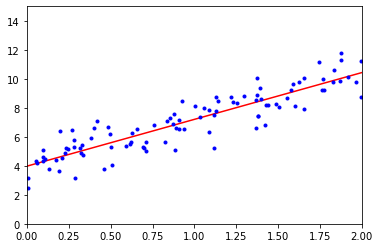

In [130]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()


In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.97742659]), array([[3.22642194]]))

In [132]:
lin_reg.predict(X_new)

array([[ 3.97742659],
       [10.43027047]])

In [133]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97742659],
       [3.22642194]])

In [134]:
np.linalg.pinv(X_b).dot(y)

array([[3.97742659],
       [3.22642194]])

In [135]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradient = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradient

theta

array([[3.97742659],
       [3.22642194]])

In [136]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[3.935494  ],
       [3.22643626]])

In [137]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.98317747]), array([3.24337013]))

In [138]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [139]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-1.92483539]), array([-1.92483539,  3.70499128]))

In [140]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.87386598]), array([[0.98008483, 0.48967926]]))

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='valid set')


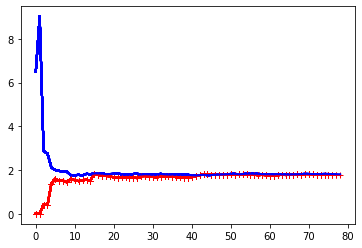

In [142]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

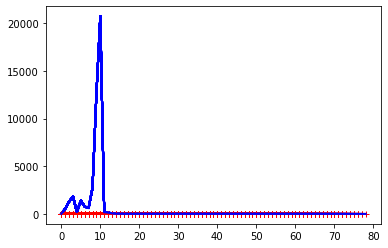

In [147]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
  ('lin_reg', LinearRegression())
])

plot_learning_curve(polynomial_regression, X, y)

In [148]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.7796423]])

In [149]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.75466533])

In [150]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.72914344])

In [151]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73436022])

In [153]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
  ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
  ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [155]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [163]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)
X, y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.1],
        [0.2],
        [0.4],
        [0.4],
        [0.3],
        [0.3],
        [0.3],
        [0.2],
        [0.4],
        [0.2],
        [0.5],
        [0.2],
        [0.2],
        [0.4],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.1],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.3],
        [0.3],
        [0.2],
        [0.6],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4],
        [1. ],
        [1.5],
        [1. ],
        [1.4],
        [1.3],
        [1.4],
        [1

In [164]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

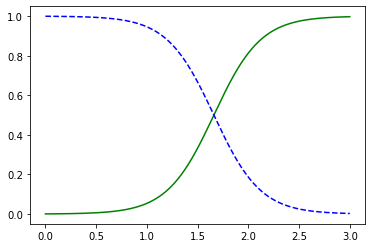

In [168]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')

In [170]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [172]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [173]:
softmax_reg.predict([[5, 2]])


array([2])

In [174]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])